In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd gdrive/My Drive/

/content/gdrive/My Drive


In [ ]:
%pwd
%mkdir proyecto

In [4]:
%ls
%cd ./proyecto/

'10 10 (1).wma'
'10 10.wma'
 1.py
 2015_SEDRA.S_Microelectronic_Circuits_7th_Edition.pdf
'24 chap - 19.wma'
'Actividad 3.docx'
'Alejandro_Estrada_Moscoso (1).docx'
 Alejandro_Estrada_Moscoso.docx
 Alejandro_Estrada_Presentation_Personelle.dotx
'analisis nodal.mp4'
'apk dispositvos moviles'/
 Articulo_Sobre_Estado_del_Arte_y_Marco_Teorico.pdf
 audios.m4a
 binario.py
 BonneSante.apk
 BonneSante_Nav.apk
'BonneSante_V1 (1).apk'
 BonneSante_V1.apk
 calculadora.apk
'CARRO RECOLECTOR DE BASURA CON MEDIDOR DE GASES DEL AMBIENTE.gdoc'
'certificado_1614033739719 (1).pdf'
'certificado_1614033739719 (2).pdf'
 certificado_1614033739719.pdf
 Circuitos_microelectr_nicos_-_Sedra__Smith.pdf
 Classroom/
'Colab Notebooks'/
 Conversor.apk
'Copia de Alter_Ego_1_-_Cahier_d_activites (1).pdf'
'Copia de Alter Ego 1 - Manuel (1) (1).pdf'
'Copia de Spanning Tree Protocol y agregación de enlaces (clase 6).pdf'
'Copie de Alter Ego 1 - Manuel (1) (1).pdf'
'Copie de LabFinalSeñales.docx'
'Cristiano_Ronaldo_ Aleja

In [5]:
%pwd

'/content/gdrive/My Drive/proyecto'

In [7]:
!pip install pyts

     |████████████████████████████████| 2.5MB 8.3MB/s 


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.decomposition import SingularSpectrumAnalysis
import scipy.io as sc
from scipy.signal import freqz

In [9]:
%pwd


'/content/gdrive/My Drive/proyecto'

In [6]:
%ls

sisLoc.mat  sisReg.mat  sisTele.mat


In [47]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

muestreo 100


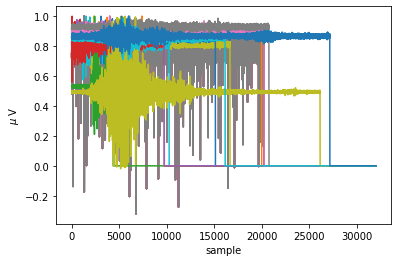

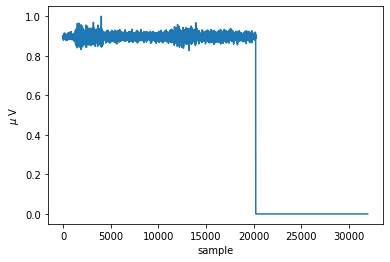

[0.88844266 0.89067381 0.89335118 0.89067381 0.8951361  0.90049085
 0.89647479 0.90182954 0.89825971 0.90004462 0.90495315 0.90227577
 0.89602856 0.88799643 0.89156627 0.89156627 0.89647479 0.90182954
 0.90316823 0.90049085 0.89424364 0.88621151 0.87951807 0.8875502
 0.88621151 0.88844266 0.8951361  0.8951361  0.89379741 0.89067381
 0.88130299 0.89424364 0.8951361  0.8951361  0.89692102 0.89468987
 0.89558233 0.89468987 0.88710397 0.89156627 0.89468987 0.89335118
 0.89825971 0.8875502  0.90227577 0.90539938 0.902722   0.89781348
 0.89558233 0.90049085 0.902722   0.89870593 0.89781348 0.90852298
 0.90406069 0.90361446 0.89870593 0.89022758 0.90093708 0.90093708
 0.89781348 0.89736725 0.89424364 0.89424364 0.89915216 0.90227577
 0.90450692 0.902722   0.89959839 0.90316823 0.89825971 0.89379741
 0.90182954 0.90004462 0.9058456  0.90049085 0.89825971 0.89825971
 0.90316823 0.89915216]


In [97]:
#Tele
data_tele = sc.loadmat('/content/gdrive/My Drive/proyecto/sisTele.mat')
data_tele.keys() # variables del diccionario

Y_tele = data_tele['Y']
fs_tele = data_tele['fs']
fs_tele = fs_tele[0][0]
print("muestreo",fs_tele)


plt.plot(Y_tele.T) #se le hace transpuesta
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()
sampleSignal = Y_tele[15,:] # se extrae una señal de la base de datos
plt.figure
plt.plot(sampleSignal)
yy = sampleSignal
plt.xlabel('sample')
plt.ylabel('$\mu$ V')
plt.show()

print(sampleSignal[:80])
#regional 

data_reg = sc.loadmat('/content/gdrive/My Drive/proyecto/sisReg.mat')
data_reg.keys() # variables del diccionario

Y_reg = data_reg['Y']
fs_reg = data_reg['fs']

#Local


data_loc = sc.loadmat('/content/gdrive/My Drive/proyecto/sisLoc.mat')
data_loc.keys() # variables del diccionario

Y_loc = data_loc['Y']
fs_loc = data_loc['fs']

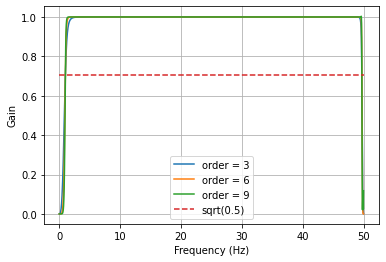

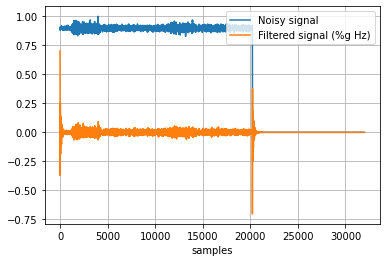

In [119]:
fs = fs_tele
lowcut = 1.0
highcut = 49.7

# Plot the frequency response for a few different orders.
plt.figure(1)
plt.clf()
for order in [3, 6, 9]:
  b, a = butter_bandpass(lowcut, highcut, fs, order=order)
  w, h = freqz(b, a, worN=2000)
  plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.figure(2)
plt.clf()
plt.plot(yy, label='Noisy signal')


y = butter_bandpass_filter(yy, lowcut, highcut, fs, order=9)
plt.plot(y, label='Filtered signal (%g Hz)' )
plt.xlabel('samples')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper right')

plt.show()

100


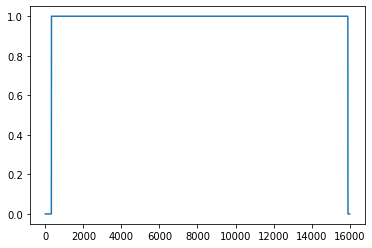

In [120]:
#Aqui empezaremos a generar el filtro para los telesismos

N = len(sampleSignal)
print(fs_tele)
# Plot the positive frequencies.
f_pos = np.arange(0, fs_tele / 2, step=fs_tele / N)
# Plot the negative frequencies.
f_neg = np.arange(-fs_tele / 2, 0, step=fs_tele / N)

f_pos = np.arange(0, fs_tele / 2, step=fs_tele / N)
H_pos = 1. * (f_pos >= 1) #funcion de transferencia, donde se cumple la condicion pone true(1) y false (0), cuando no se cumple
H2_pos = 1. * (f_pos <= 49.7)
Hfinal = H_pos * H2_pos



f_neg = np.arange(-fs_tele / 2, 0, step=fs_tele / N)
H_neg = 1. * (f_neg <= -1)
H_neg2 = 1. * (f_neg >= -49.7)
Hfinal2 = H_neg * H_neg2

H = np.concatenate([Hfinal, Hfinal2]) #xfilt(w) = x(w)*h(w)'''
plt.plot(Hfinal)

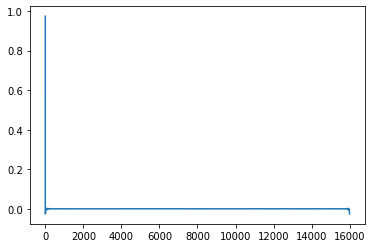

In [121]:
h = np.real(np.fft.ifft(H)) # The IFFT should automatically be real-valued. We take np.real just to be safe.
plt.plot(h)

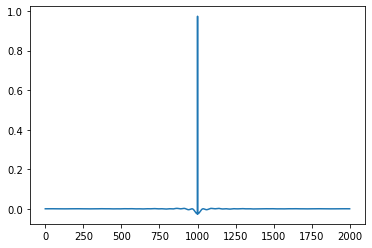

In [122]:
h_trunc = np.concatenate([h[-1000:], h[:1000]])
plt.plot(h_trunc)

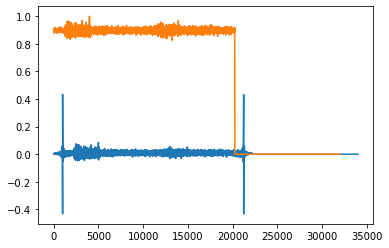

In [123]:
y = np.convolve(yy, h_trunc)
y = y[:-1]

N = len(y)
t = np.arange(0, N / fs, step=1 / fs)
plt.figure(4)
plt.plot(y)
plt.plot(yy)

In [126]:
zeos = np.zeros((2,3))
print(zeos)
zeos[0] = [1,2,3]
print(zeos)

[[0. 0. 0.]
 [0. 0. 0.]]
[[1. 2. 3.]
 [0. 0. 0.]]
